In [2]:
from pylab import *
%matplotlib inline

# Ecuacion diferencial a resolver 
$$
\ddot{x} + 0.1\dot{x} + 4sin(x) = .5sin(wt)
$$
con las condiciones iniciales:
$$
x(0)=0 \\ \\  \dot{x}(0)=1 
$$

Para obtener dos ecuaciones diferenciales de orden 1, se hará el siguiente cambio de variable: 

$$
y(t)=x(t)\\ \\dy(t)=\dot{x}(t) 
$$
Definimos las funciones: 
$$
f_1(t,y(t),dy(t)) = dy(t)\\ \\f_2(t,y(t),dy(t)) = .5sin(wt) - 0.1dy(t) - 4sin(y(t))
$$

In [3]:
def f1(dy,y,t,w): 
    return dy
def f2(dy,y,t,w): 
    return .5*sin((w)*t) - .1*dy - 4*sin(y)

In [4]:
def euler(funcion1,funcion2,p_ini,t_final,h,w): 
    tiempos = arange(0,t_final+h,h) 
    y = [0]*len(tiempos) 
    dy = [0]*len(tiempos) 
    y[0] = p_ini[0] 
    dy[0] = p_ini[1] 
    for i in range(len(tiempos)-1): 
        y[i+1] = y[i] + funcion1(dy[i],y[i],tiempos[i],w)*h 
        dy[i+1]=dy[i] + funcion2(dy[i],y[i],tiempos[i],w)*h 
    return tiempos,y,dy

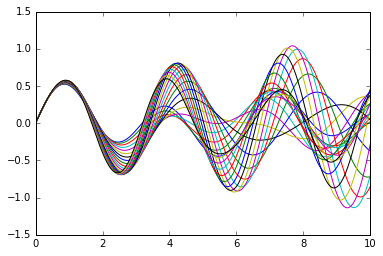

In [5]:
for j in frange(1,3,0.1):
    sol = euler(f1,f2,[0,1],10.,.001,j) 
    plot(sol[0],sol[1]) 
show()

In [6]:
def d_f1(dy,y,t,w):
    return 0,1
def d_f2(dy,y,t,w): 
    return .5*w*cos(w*t),-4*cos(y)

In [7]:
def segundo_orden1(ec_dif1,ec_dif2,p_ini,t_final,ec_jac1,ec_jac2,h,w): 
    tiempo=arange(0,t_final+h,h) 
    y = zeros(len(tiempo)) 
    dy = zeros(len(tiempo)) 
    y[0] = p_ini[0]  
    dy[0] = p_ini[1] 
    for i in range(len(tiempo)-1): 
        y[i+1] = y[i] + h*ec_dif1(dy[i],y[i],tiempo[i],w) 
        y[i+1] += 0.5*h*h*ec_jac1(dy[i],y[i],tiempo[i],w)[0]
        y[i+1] += 0.5*h*h*ec_jac1(dy[i],y[i],tiempo[i],w)[1]*ec_dif1(dy[i],y[i],tiempo[i],w)
        dy[i+1] = dy[i] + h*ec_dif2(dy[i],y[i],tiempo[i],w)  
        dy[i+1] += 0.5*h*h*ec_jac2(dy[i],y[i],tiempo[i],w)[0]
        dy[i+1] += 0.5*h*h*ec_jac2(dy[i],y[i],tiempo[i],w)[1]*ec_dif2(dy[i],y[i],tiempo[i],w)
    return tiempo,y,dy 

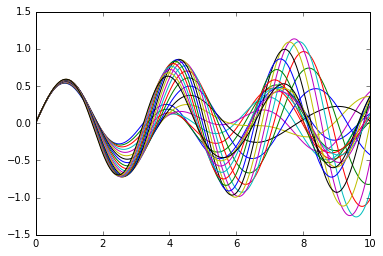

In [8]:
for j in frange(1,3,0.1):
    y_seg = segundo_orden1(f1,f2,[0,1],10.,d_f1,d_f2,.01,j) 
    plot(y_seg[0],y_seg[1])
show()

In [9]:
def rk2(ec_1,ec_2,p_ini,t_final,h,w):
    tiempo=arange(0,t_final+h,h) 
    y = zeros(len(tiempo)) 
    dy = zeros(len(tiempo)) 
    y[0] = p_ini[0] 
    dy[0] = p_ini[1] 
    for i in xrange(len(tiempo)-1): 
        k1 = ec_1(dy[i],y[i],tiempo[i],w) 
        k2 = h*ec_1(dy[i]+k1*h*.5,y[i]+k1*h*.5,tiempo[i]+h*.5,w)
        y[i+1] = y[i] + k2
        dk1 = ec_2(dy[i],y[i],tiempo[i],w) 
        dk2 = h*ec_2(dy[i]+dk1*h*.5,y[i]+dk1*h*.5,tiempo[i]+h*.5,w)
        dy[i+1] = dy[i] + dk2
    return tiempo,y,dy 

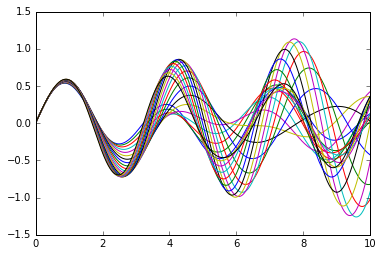

In [10]:
for j in frange(1,3,0.1):
    sol1 = rk2(f1,f2,[0,1],10.,.01,j) 
    plot(sol1[0],sol1[1])
show()

In [11]:
def rk4(ec_1,ec_2,p_ini,t_final,h,w):
    tiempo=arange(0,t_final+h,h) 
    y = zeros(len(tiempo)) 
    dy = zeros(len(tiempo))  
    y[0] = p_ini[0] 
    dy[0] = p_ini[1] 
    for i in xrange(len(tiempo)-1): 
        k1 = ec_1(dy[i],y[i],tiempo[i],w)  
        k2 = ec_1(dy[i]+k1*h*.5,y[i]+k1*h*.5,tiempo[i]+h*.5,w)
        k3 = ec_1(dy[i]+k2*h*.5,y[i]+k2*h*.5,tiempo[i]+h*.5,w)
        k4 = ec_1(dy[i]+k3*h,y[i]+k3*h,tiempo[i]+h,w)
        y[i+1] = y[i] + h*(k1+2*k2+2*k3+k4)/6
        dk1 = ec_2(dy[i],y[i],tiempo[i],w) 
        dk2 = ec_2(dy[i]+dk1*h*.5,y[i]+dk1*h*.5,tiempo[i]+h*.5,w)
        dk3 = ec_2(dy[i]+dk2*h*.5,y[i]+dk2*h*.5,tiempo[i]+h*.5,w)
        dk4 = ec_2(dy[i]+dk3*h,y[i]+k3*h,tiempo[i]+h,w)
        dy[i+1] = dy[i] + h*(dk1+2*dk2+2*dk3+dk4)/6
    return tiempo,y,dy 

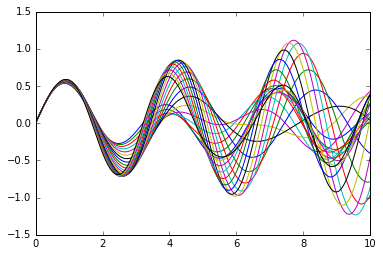

In [19]:
for j in frange(1,3,0.1):
    sol2 = rk4(f1,f2,[0,1],10.,.01,j) 
    plot(sol2[0],sol2[1])
show()

# Con todos los métodos de Integración se observa que el comportamiento de la solución en función de ω, cambia con respecto a cada  ω. Y dicho cambio se ve mas marcado para t finales mas grandes. La solución parece ser la misma para diferentes  ω si se usan t finales mas pequeños, es decir la solución no depende de  ω con t finales pequeños, como se observa en la siguiente gráfica.

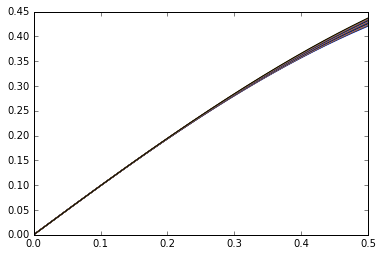

In [18]:
for j in frange(1,3,0.1):
    sol2 = rk4(f1,f2,[0,1],.5,.001,j) 
    plot(sol2[0],sol2[1])
show()

#  También se observa que el tamaño de los pasos de integración  influye en el resultado para diferentes  ω. Las soluciones tienen una diferencia mas marcada para distintas ω, al disminuir el valor  h, como se observa en las siguientes gráficas.

# h=.1 para y(ω=1)   y   y(ω=3)

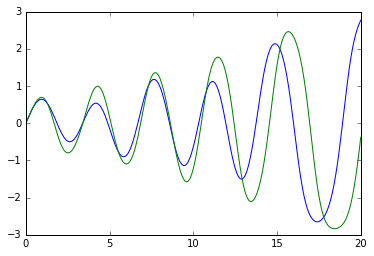

In [38]:
for j in frange(1,3,3):
    sol3 = rk4(f1,f2,[0,1],20.,.1,j)  
    plot(sol3[0],sol3[1])
show()

# h=.001 para y(ω=1)   y   y(ω=3)

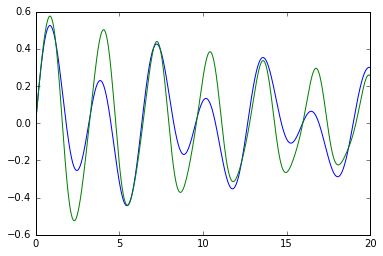

In [37]:
for j in frange(1,3,3): 
    sol4 = rk4(f1,f2,[0,1],20.,.001,j) 
    plot(sol4[0],sol4[1])
show()